In [67]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  readability import Readability
import nltk


In [47]:
# Download the punkt tokenizer models
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Felix
[nltk_data]     Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
"""
Possible TODO:
- sentiment
- readabilty Flesch-Kincaid score
- Part of Speech: nouns, verbs, adjectives
- Named entities
- lexical desnity: ratio of content word (nouns, adjectives, adverbs) or of stop words vs not stop words
"""

## Read Data

In [17]:
# Load the data from csv
df = pd.read_csv('data/hack.csv')

print(df.shape)

(8000, 6)


In [18]:
# count how many is_humor is True
is_humor = df['is_humor'].value_counts()
print(is_humor)

is_humor
1    4932
0    3068
Name: count, dtype: int64


In [19]:
# 5 sample of is_humor is True
for i in range(5):
    print(df[df['is_humor'] == True].iloc[i]['text'])
    print()

TENNESSEE: We're the best state. Nobody even comes close. *Elevennessee walks into the room* TENNESSEE: Oh shit...

A man inserted an advertisement in the classifieds "Wife Wanted". The next day, he received 1000 of replies, all reading: "You can have mine." Free delivery also available at your door step

How many men does it take to open a can of beer? None. It should be open by the time she brings it to the couch.

Told my mom I hit 1200 Twitter followers. She pointed out how my brother owns a house and I'm wanted by several collection agencies. Oh ma!

Roses are dead. Love is fake. Weddings are basically funerals with cake.



In [20]:
# 5 sample of is_humor is True
for i in range(5):
    print(df[df['is_humor'] == False].iloc[i]['text'])
    print()

'Trabajo,' the Spanish word for work, comes from the Latin term 'trepaliare,' meaning torture.

I enrolled on some skill training and extra curricula activities that added shape to my weekends and after-work schedule. The more days passed, the more exposed I was to how blindly in love I was with an obsession. It's been months now and we are just cool as men.

Men who ejaculated 21 times or more a month had a lower risk of prostate cancer than those who ejaculated four to seven times a month, according to researchers at Harvard T.H. Chan School of Public Health.

I got REALLY angry today and it wasn't about nothing, but you're going to have to take my word for that.

A dog in Mexico named Frida saved the lives of 12 people who were trapped under rubble after an earthquake in 2017. She has identified a total of 52 bodies throughout her career and is considered a national heroine. She's officially retired.



## Tokenize

In [68]:
def get_readability(text):
    r = Readability(text)
    return r.flesch_kincaid().score
# r = Readability(text)

# r.flesch_kincaid()
# r.flesch()
# r.gunning_fog()
# r.coleman_liau()
# r.dale_chall()
# r.ari()
# r.linsear_write()
# r.smog()
# r.spache()

# TODO_ do this with tokenization and remove stopwords
df['readability'] = df['text'].apply(get_readability)

c:\Users\Felix Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\readability\text\analyzer.py:132: SyntaxWarning: invalid escape sequence '\/'
  match = re.match('^[.,\/#!$%\'\^&\*;:{}=\-_`~()]$', token)


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Felix Laptop/nltk_data'
    - 'c:\\Users\\Felix Laptop\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data'
    - 'c:\\Users\\Felix Laptop\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data'
    - 'c:\\Users\\Felix Laptop\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\Felix Laptop\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'Laptop/AppData/Roaming/nltk_data'
    - 'Laptop\\AppData\\Roaming\\nltk_data'
    - 'C:\\Felix Laptop\\AppData\\Roaming\\nltk_data'
    - 'C:\\Users\\Felix Laptop\\AppData\\Roaming\\nltk_data'
    - 'C:/Users/Felix Laptop/AppData/Roaming/nltk_data'
    - 'C:/nltk_data'
    - 'C:/nltk_data'
**********************************************************************


In [ ]:
# TODO: do this with tokenization and lemmatization not just split
df['richenss'] = df['text'].apply(lambda x: len(set(x.split())) / len(x.split()))

In [ ]:
# delete path if not needed
# Set the NLTK data path
path = 'C:/nltk_data'
nltk.data.path.append(path)


# tokenization
df['tokenized_text'] = df['text'].apply(nltk.word_tokenize)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Felix Laptop/nltk_data'
    - 'c:\\Users\\Felix Laptop\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data'
    - 'c:\\Users\\Felix Laptop\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data'
    - 'c:\\Users\\Felix Laptop\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\Felix Laptop\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'Laptop/AppData/Roaming/nltk_data'
    - 'Laptop\\AppData\\Roaming\\nltk_data'
    - 'C:\\Felix Laptop\\AppData\\Roaming\\nltk_data'
    - 'C:\\Users\\Felix Laptop\\AppData\\Roaming\\nltk_data'
    - 'C:/Users/Felix Laptop/AppData/Roaming/nltk_data'
    - 'C:/nltk_data'
    - 'C:/nltk_data'
**********************************************************************


## Added General Characteristics

In [21]:
# count length of each joke
df['text_length'] = df['text'].apply(len)

In [22]:
# word count of each joke
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

In [23]:
# avg word length of each joke
df['avg_word_length'] = df['text'].apply(lambda x: np.mean([len(word) for word in x.split()]))

In [24]:
# count of punctuation
df['punctuation_count'] = df['text'].apply(lambda x: len([c for c in x if c in ['.', ',', '!', '?']]))

In [25]:
# readabilty Flesch-Kincaid score
# ... not implemented yet

## Plots of Characteristics

In [31]:
# avg, min, max, std of text_length for each is_humor
print(df.groupby('is_humor')['text_length'].agg(['mean', 'min', 'max', 'std']))

                mean  min  max        std
is_humor                                 
0         122.351695    8  286  62.714395
1         107.076440   10  280  44.714322


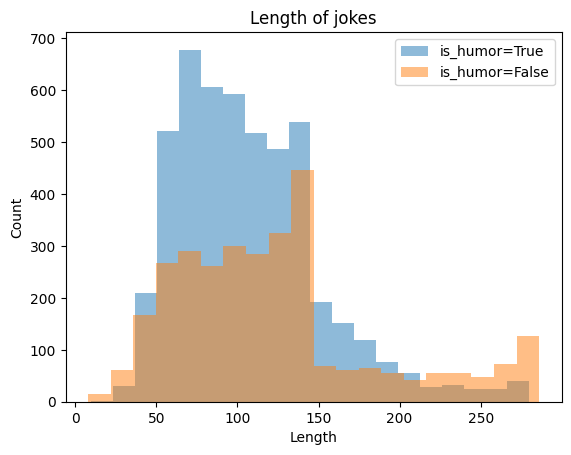

In [37]:
# 2 hist of length of jokes
plt.hist(df[df['is_humor'] == True]['text_length'], bins=20, alpha=0.5, label='is_humor=True')
plt.hist(df[df['is_humor'] == False]['text_length'], bins=20, alpha=0.5, label='is_humor=False')
plt.title('Length of jokes')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend()
plt.show()

In [32]:
# avg, min, max, std of word_count for each is_humor
print(df.groupby('is_humor')['word_count'].agg(['mean', 'min', 'max', 'std']))

               mean  min  max        std
is_humor                                
0         21.932855    1   63  11.166029
1         20.240268    2   57   8.590675


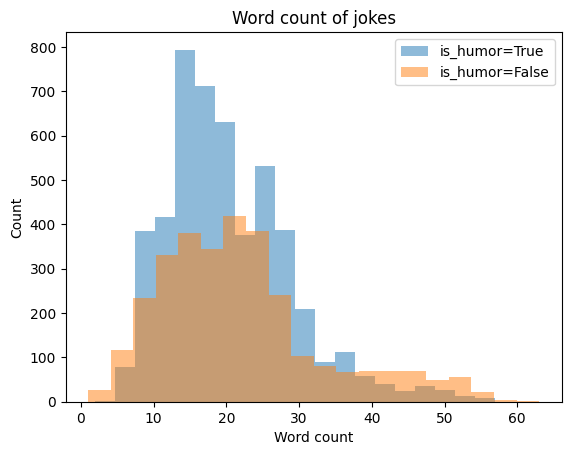

In [33]:
# 2 hist of word count of jokes
plt.hist(df[df['is_humor'] == True]['word_count'], bins=20, alpha=0.5, label='is_humor=True')
plt.hist(df[df['is_humor'] == False]['word_count'], bins=20, alpha=0.5, label='is_humor=False')
plt.title('Word count of jokes')
plt.xlabel('Word count')
plt.ylabel('Count')
plt.legend()
plt.show()

In [34]:
# avg, min, max, std of avg_word_length for each is_humor
print(df.groupby('is_humor')['avg_word_length'].agg(['mean', 'min', 'max', 'std']))

              mean       min   max       std
is_humor                                    
0         4.663354  2.857143   9.0  0.685291
1         4.400999  2.700000  11.2  0.591486


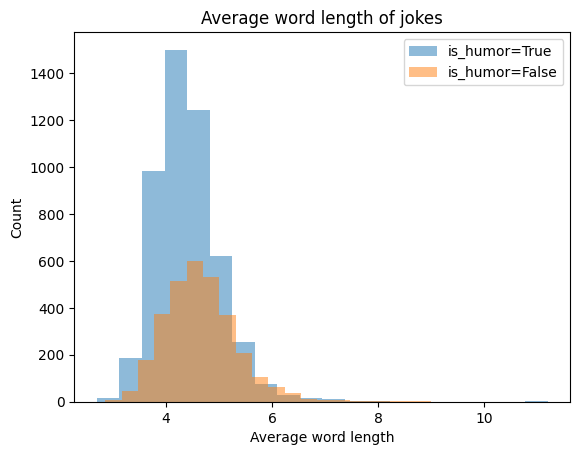

In [36]:
# 2 hist of avg word length of jokes
plt.hist(df[df['is_humor'] == True]['avg_word_length'], bins=20, alpha=0.5, label='is_humor=True')
plt.hist(df[df['is_humor'] == False]['avg_word_length'], bins=20, alpha=0.5, label='is_humor=False')
plt.title('Average word length of jokes')
plt.xlabel('Average word length')
plt.ylabel('Count')
plt.legend()
plt.show()

In [38]:
# avg, min, max, std of punctuation_count for each is_humor
print(df.groupby('is_humor')['punctuation_count'].agg(['mean', 'min', 'max', 'std']))

              mean  min  max       std
is_humor                              
0         2.678944    0   17  2.078564
1         2.580495    0   18  2.037324


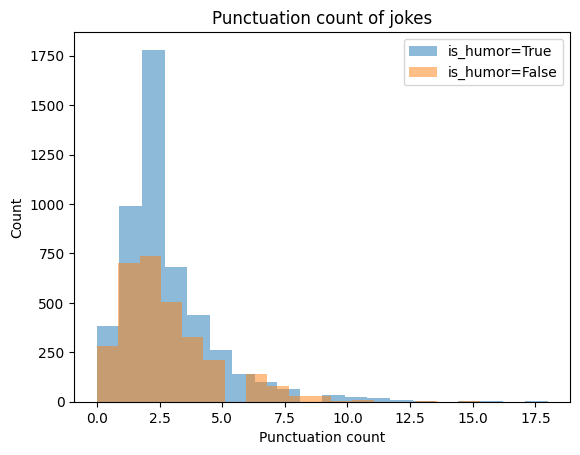

In [39]:
# 2 hist of punctuation count of jokes
plt.hist(df[df['is_humor'] == True]['punctuation_count'], bins=20, alpha=0.5, label='is_humor=True')
plt.hist(df[df['is_humor'] == False]['punctuation_count'], bins=20, alpha=0.5, label='is_humor=False')
plt.title('Punctuation count of jokes')
plt.xlabel('Punctuation count')
plt.ylabel('Count')
plt.legend()
plt.show()

In [71]:
# avg, min, max, std of richenss for each is_humor
print(df.groupby('is_humor')['richenss'].agg(['mean', 'min', 'max', 'std']))

              mean       min  max       std
is_humor                                   
0         0.922943  0.088889  1.0  0.079424
1         0.933334  0.478261  1.0  0.071959


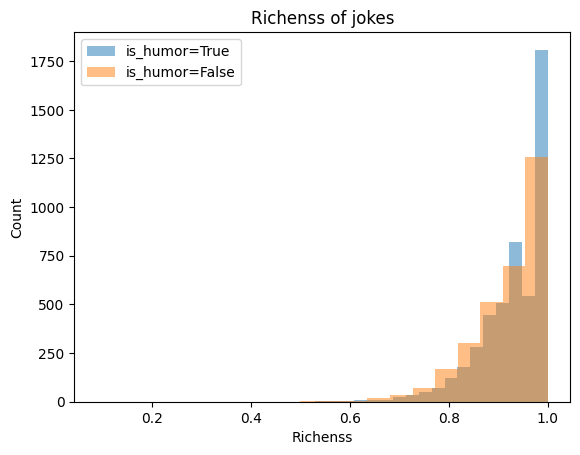

In [72]:
# 2 hist of richenss of jokes
plt.hist(df[df['is_humor'] == True]['richenss'], bins=20, alpha=0.5, label='is_humor=True')
plt.hist(df[df['is_humor'] == False]['richenss'], bins=20, alpha=0.5, label='is_humor=False')
plt.title('Richenss of jokes')
plt.xlabel('Richenss')
plt.ylabel('Count')
plt.legend()
plt.show()

## Plots of Characteristics detailed

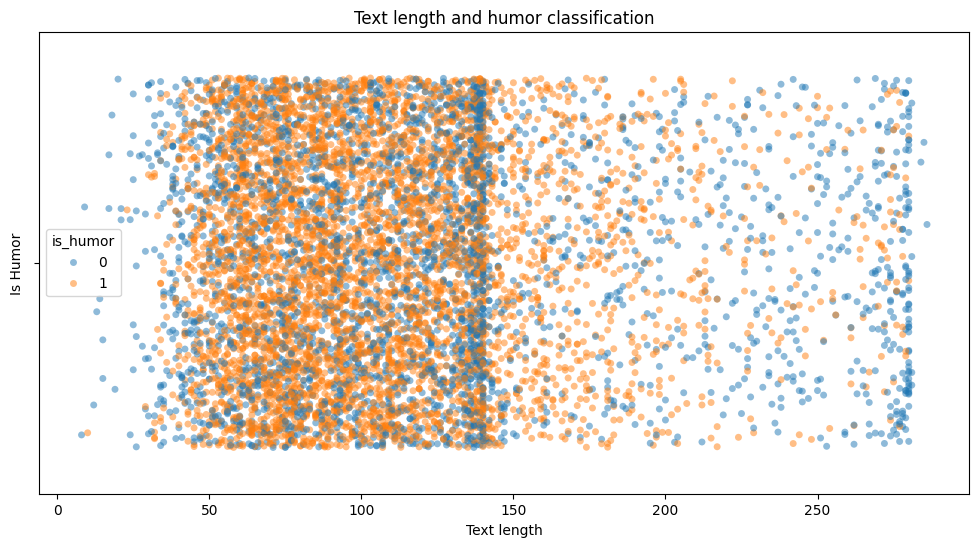

In [55]:
# Plot the stripplot
plt.figure(figsize=(12, 6))
sns.stripplot(x='text_length', data=df, hue='is_humor', jitter=0.4, alpha=0.5)
plt.title('Text length and humor classification')
plt.xlabel('Text length')
plt.ylabel('Is Humor')
plt.show()

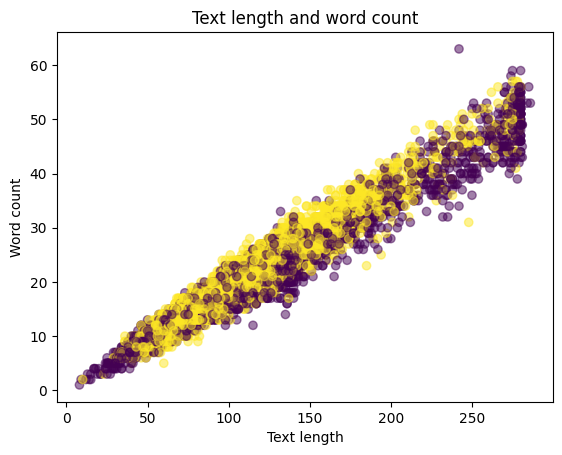

In [50]:
# scatterplot of text_length and word_count
plt.scatter(df['text_length'], df['word_count'], c=df['is_humor'], alpha=0.5, cmap='viridis')
plt.title('Text length and word count')
plt.xlabel('Text length')
plt.ylabel('Word count')
plt.show()

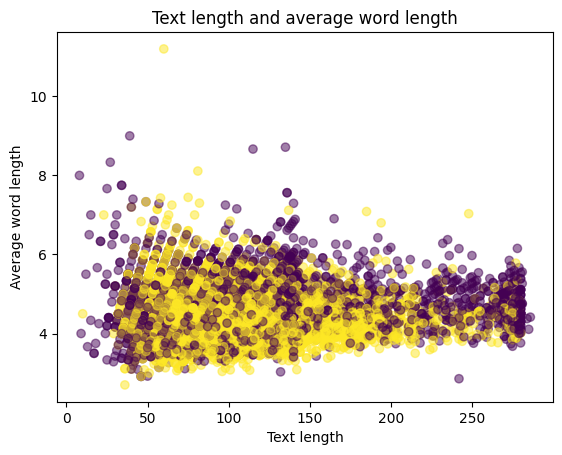

In [51]:
# scatter text_length and avg_word_length
plt.scatter(df['text_length'], df['avg_word_length'], c=df['is_humor'], alpha=0.5, cmap='viridis')
plt.title('Text length and average word length')
plt.xlabel('Text length')
plt.ylabel('Average word length')
plt.show()

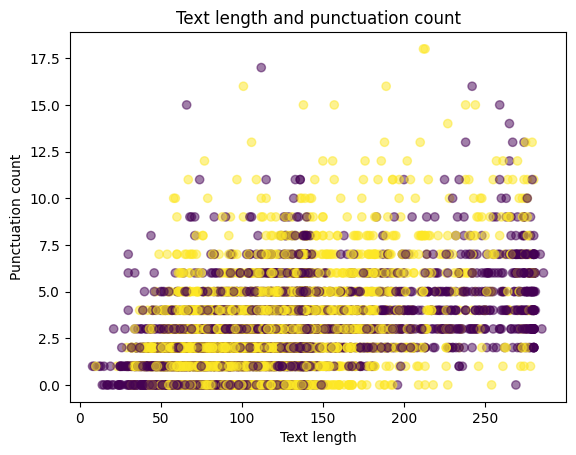

In [52]:
# scatter text_length and punctuation_count
plt.scatter(df['text_length'], df['punctuation_count'], c=df['is_humor'], alpha=0.5, cmap='viridis')
plt.title('Text length and punctuation count')
plt.xlabel('Text length')
plt.ylabel('Punctuation count')
plt.show()